## Xóa những khóa học có dưới 10 học viên

In [ ]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
user= pd.read_json('/kaggle/input/lightmooccubex/entities/user.json', lines=True)
user

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,gender,school,year_of_birth,course_order,enroll_time
0,U_22,我,0.0,,2015.0,"[682129, 2294668]","[2019-10-12 10:28:02, 2020-11-21 14:03:28]"
1,U_24,王帅国,1.0,清华大学,6558.0,"[597214, 605512, 597211, 597314, 597208, 62950...","[2019-05-20 16:06:48, 2019-05-24 19:34:43, 201..."
2,U_25,王帅国,0.0,清华大学,NaN,[1903985],[2020-08-07 18:59:13]
3,U_53,于歆杰,1.0,清华大学,1973.0,"[696679, 1704639, 943255, 1729417, 682164, 177...","[2020-03-01 21:24:30, 2020-03-12 16:17:02, 202..."
4,U_54,马昱春,2.0,清华大学,NaN,"[682442, 682164, 1748240, 1778890, 1829031, 17...","[2019-10-09 02:17:49, 2019-11-08 00:49:03, 202..."
...,...,...,...,...,...,...,...
3330289,U_34712108,,0.0,,NaN,"[697791, 782490, 799796]","[2020-10-12 03:39:14, 2020-10-12 03:41:00, 202..."
3330290,U_34712111,,2.0,,NaN,[2199449],[2020-10-12 03:46:08]
3330291,U_34712112,,1.0,,NaN,[916828],[2020-10-12 03:51:36]
3330292,U_34712114,,1.0,,NaN,[735405],[2020-10-12 03:57:05]


In [ ]:
course_count = user["course_order"].explode().value_counts().sort_values(ascending=False)
course_count

course_order
936971     231674
696994     181697
676932     125789
697791      96210
883345      78374
            ...  
907952          1
926166          1
927944          1
932105          1
2221821         1
Name: count, Length: 4701, dtype: int64

In [ ]:
frequency = course_count.values
counts = pd.Series(frequency).value_counts()
counts

1       907
2       124
10       45
3        40
4        35
       ... 
4307      1
4314      1
4325      1
4337      1
2241      1
Name: count, Length: 2190, dtype: int64

In [ ]:
counts.describe()

count    2190.000000
mean        2.146575
std        19.671351
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       907.000000
Name: count, dtype: float64

Text(0.5, 1.0, 'Histogram with 10 Bins')

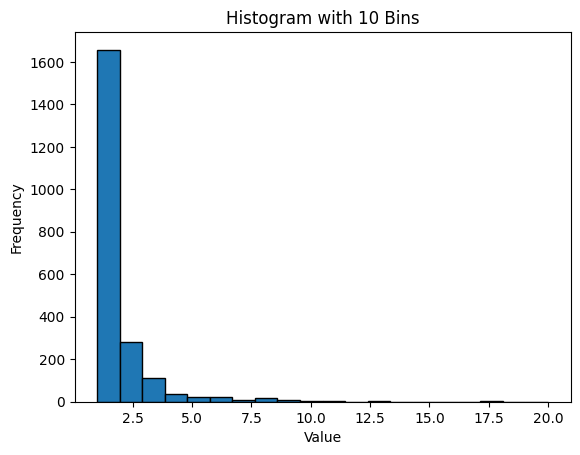

In [ ]:
# Plot histogram
plt.hist(counts, bins=20, edgecolor='black', range=(1, 20))  # 10 bins, range from 1 to 500

# Labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with 10 Bins")

Text(0.5, 1.0, 'Histogram with 10 Bins')

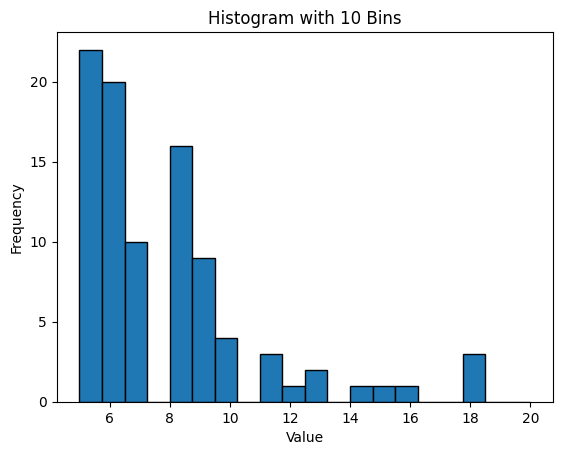

In [ ]:
# Plot histogram
plt.hist(counts, bins=20, edgecolor='black', range=(5, 20))  # 10 bins, range from 1 to 500

# Labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with 10 Bins")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


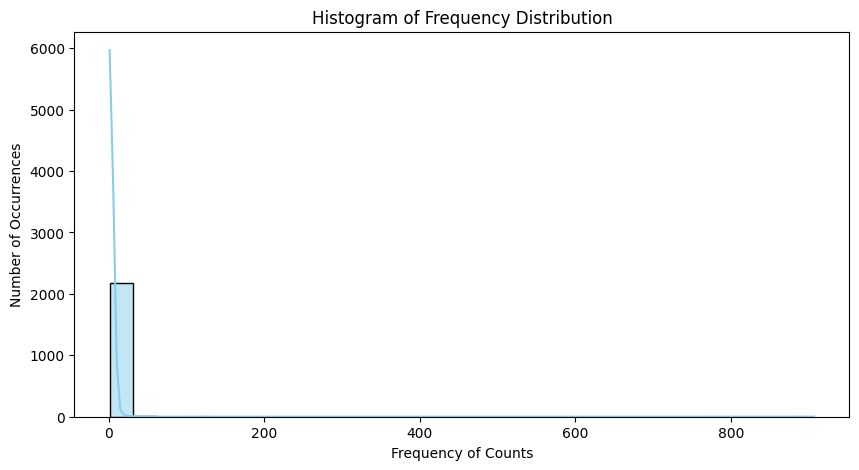

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(counts, bins=30, kde=True, color='skyblue')  # KDE adds a smooth curve
plt.xlabel("Frequency of Counts")
plt.ylabel("Number of Occurrences")
plt.title("Histogram of Frequency Distribution")
plt.show()

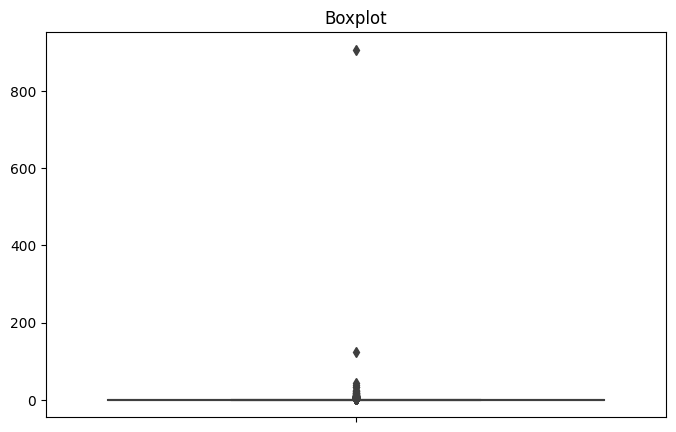

In [ ]:
# Plot Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=counts)  # Replace 'id' with a numerical column if needed
plt.ylabel("")  # Change label if using another column
plt.title("Boxplot")
plt.show()

In [ ]:
# Assuming 'data' is your NumPy array
filtered_data = course_count[course_count >= 11]  # Remove values equal to 1

filtered_data

course_order
936971     231674
696994     181697
676932     125789
697791      96210
883345      78374
            ...  
2141537        11
1926748        11
2342491        11
2199259        11
2179942        11
Name: count, Length: 3425, dtype: int64

In [ ]:
# Convert Series to DataFrame
filtered_df = filtered_data.to_frame().reset_index()

# Rename columns for clarity
filtered_df.columns = ['course_order', 'count']

# Add "C_" prefix to the course_order column
filtered_df['course_id'] = 'C_' + filtered_df['course_order'].astype(str)

# Save only the 'course_id' column to CSV
filtered_df[['course_id']].to_csv("filter_course_by_user.csv", index=False)

print("CSV file saved as filter_course_by_user.csv")

CSV file saved as filter_course_by_user.csv
